In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/tripadvisor_hotel_reviews.csv')

In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (20491, 2)


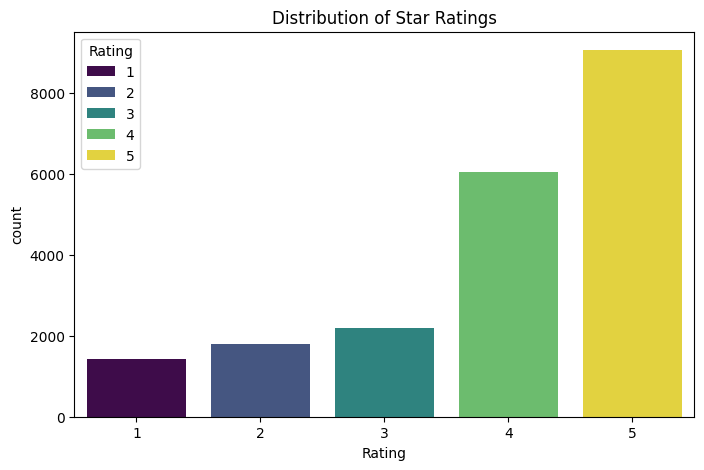

In [5]:
# Visualizing Class imbalance
plt.figure(figsize=(8,5))
sns.countplot(x='Rating', hue='Rating', data=df, palette='viridis')
plt.title('Distribution of Star Ratings')
plt.show()

In [6]:
# 3. Define the Problem: Binary Classification
# Strategy:
# Ratings 1, 2 -> Negative (0)
# Rating 3     -> Neutral (Drop these to avoid confusion)
# Ratings 4, 5 -> Positive (1)

def transform_rating(rating):
    if rating <= 2:
        return 0
    elif rating >=4:
        return 1
    else:
        return -1 # Neutral review.

In [7]:
df['Sentiment'] = df['Rating'].apply(transform_rating)

In [8]:
df = df[df['Sentiment'] != -1]

In [9]:
print(f"New Shaped data after dropping neutral Values: {df.shape}")
print("Class Balance")
print(df['Sentiment'].value_counts(normalize=True))

New Shaped data after dropping neutral Values: (18307, 3)
Class Balance
Sentiment
1    0.824439
0    0.175561
Name: proportion, dtype: float64


In [10]:
df.to_csv('../data/processed_reviews.csv', index=False)

In [11]:

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Add src to system path to import the module
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from preprocessing import TextPreprocessor

# Load data (if not already loaded)
df = pd.read_csv('../data/processed_reviews.csv')

# Initialize Preprocessor
preprocessor = TextPreprocessor()

# Apply cleaning
print("Cleaning reviews... this may take a moment.")
df['cleaned_review'] = df['Review'].apply(preprocessor.clean_text)

print(df[['Review', 'cleaned_review']].head())



Cleaning reviews... this may take a moment.
                                              Review  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  unique, great stay, wonderful time hotel monac...   
3  great stay great stay, went seahawk game aweso...   
4  love monaco staff husband stayed hotel crazy w...   

                                      cleaned_review  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  unique great stay wonderful time hotel monaco ...  
3  great stay great stay went seahawk game awesom...  
4  love monaco staff husband stayed hotel crazy w...  


In [12]:
# Save the cleaned data so other scripts can use it
df.to_csv('../data/processed_reviews.csv', index=False)
print("Successfully saved cleaned data to data/processed_reviews.csv")

Successfully saved cleaned data to data/processed_reviews.csv


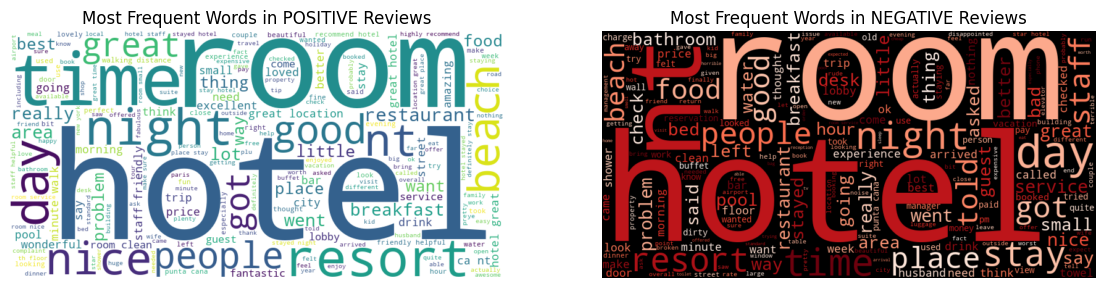

In [13]:
# Separate positive and negative reviews
positive_text = " ".join(df[df['Sentiment'] == 1]['cleaned_review'])
negative_text = " ".join(df[df['Sentiment'] == 0]['cleaned_review'])

# Generate WordClouds
wc_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wc_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(wc_pos, interpolation='bilinear')
plt.title('Most Frequent Words in POSITIVE Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_neg, interpolation='bilinear')
plt.title('Most Frequent Words in NEGATIVE Reviews')
plt.axis('off')

plt.show()

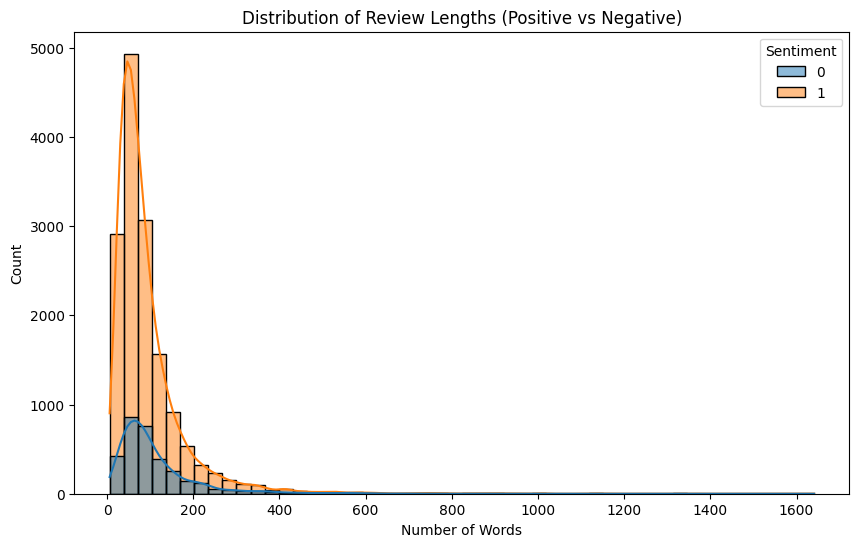

In [14]:
df['review_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', hue='Sentiment', kde=True, bins=50)
plt.title('Distribution of Review Lengths (Positive vs Negative)')
plt.xlabel('Number of Words')
plt.show()